# Bike Sharing Demand Prediction - Data Wrangling


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import missingno as msno

## About Data Set

### Load the data

In [2]:
# Read the data
mydata = pd.read_csv('./../Data/train.csv', parse_dates=True, index_col='datetime')

### Shape of the data

In [3]:
print('Shape of data: ', mydata.shape)

Shape of data:  (10886, 11)


The provided data consists of over 10k observations with 11 column variables (excluding the datetime column - which has been used as an index)

### Look into the first few observations

In [4]:
mydata.head(3)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


### Column Data Types

In [5]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10886 entries, 2011-01-01 00:00:00 to 2012-12-19 23:00:00
Data columns (total 11 columns):
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8)
memory usage: 1020.6 KB


Data consists of 12 columns variables and all of them are Numeric Columns. 

### Statistical Details for every column
Below table provides the statistical details for each column. 

In [6]:
mydata.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [7]:
print(mydata.index[[0, -1]]) # Range of time stamp

DatetimeIndex(['2011-01-01 00:00:00', '2012-12-19 23:00:00'], dtype='datetime64[ns]', name='datetime', freq=None)


In [8]:
print('Casual + Registered = Count? ', ~(mydata.casual + mydata.registered - mydata['count']).any())

Casual + Registered = Count?  True


### Data Set Summary

The below table summarizes the column content for the data

| Column Name | Format | Range | Explanation |
|-|-|-|-|
| datetime | yyyy-mm-dd hh:mm:ss | 2011-01-01 00:00:00 to<br>2012-12-19 23:00:00 | hourly date + time stamp|
| season | int64 | 1 to 4 | 1 = Spring, 2 = Summer, 3 = Fall, 4 = Winter |
| holiday | int64 | 0 or 1 | 1 = Holiday, 0 = Not a Holiday |
| workingday | int64 | 0 or 1 | 1 = Neither a weekend nor holiday, 0 = Either a weekend or a holiday |
| weather | int64 | 1 to 4 | 1 = Clear, Few clouds, Partly cloudy, Partly cloudy <br> 2 = Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist <br> 3 = Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds  <br> 4 = Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog |
| temp | float64 | -0.82 to 41 | Temperature in Celsius | 
| atemp | float64 | 0.76 to 45.46 | 'Feels like" temperature in Celsius |
| humidity | int64 | 0 to 100 | Relative humidity | 
| windspeed | float64 | 0 to 57 | Wind Speed | 
| casual | int64 | 0 to 367 | Number of non-registered user rentals initiated | 
| registered | int64 | 0 to 886 | Number of registered user rentals initiated |
| count | int64 | 1 to 977 | Number of total rentals (casual + registered) |

### Initial Predictions

+ The target column (count) which refers to the number of bikes that have been rented at that hour, ranges between 1 and 977 over the 2 year span. 
+ Mean(count) = 192, with median and 75% quantile = 145 and 284, respectively. This suggests that the 'count' distribution is more denser at lower values. This is expected as out of 24 hours, we would expect the bike demand/usage to be high for maximum of maybe 6 hours or so. 
+ Would expect the strongest correlation from hours component in the datetime column
+ During weekdays most of the bikers would probably be the local commuters (more likely registered users) and during weekends and holidays, the majority of the bikers are more likely to be tourists (casual riders) 



## Data Cleaning 

### Missing Data Fields

From the above .info() command, we notice that every column has 10886 (= number of rows) non-null values. This seems to be a very clean set of data and there are no missing data in any of the 'row x columns'.  



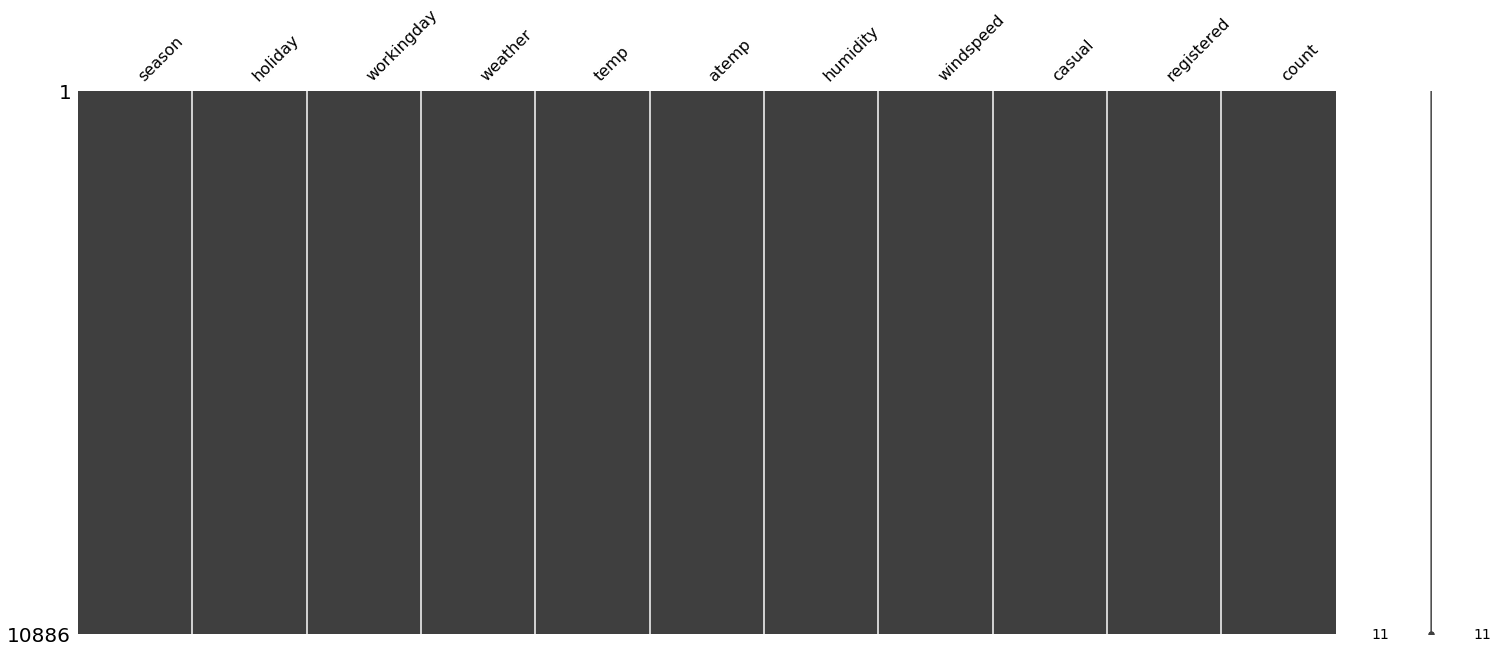

In [9]:
msno.matrix(mydata)

### Categorical Data

From the above set of 8 variables, we notice that the 4 of those columns ['season', 'holiday', 'workingday', 'weather'] should be category data types.  
Also, split the datetime column into ['month', 'day', 'hour'] categories since the bike demand is more likely dependent on these individual categories  
Creating the 7 category columns 

In [10]:
mydata['month'] = [x.month for x in mydata.index]
mydata['day'] = [x.day for x in mydata.index]
mydata['hour'] = [x.hour for x in mydata.index]
category_list = ['month', 'day', 'hour', 'season', 'holiday', 'workingday', 'weather']
for var in category_list:
    mydata[var] = mydata[var].astype('category')

### Categorical Data Box Plots 

Using seaborn tools to look for outliers.

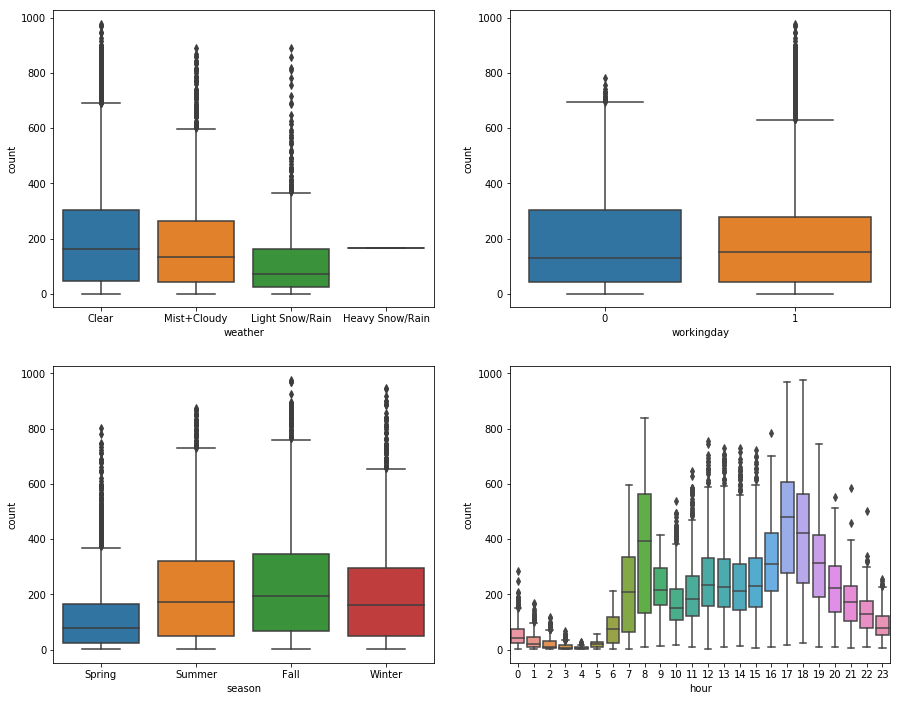

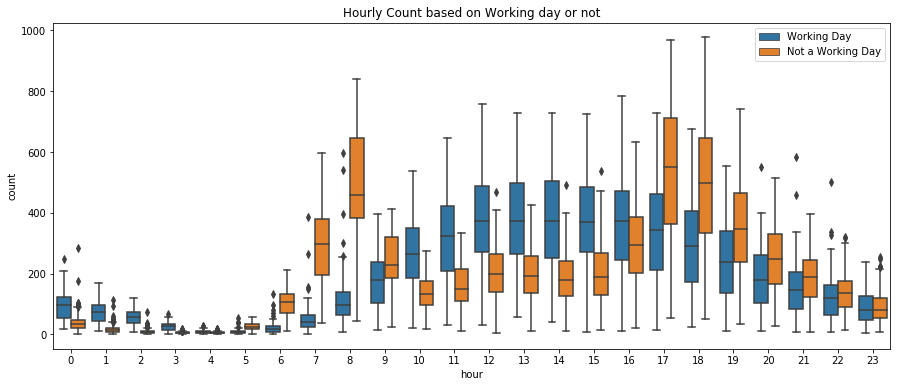

In [11]:
f, axes = plt.subplots(2, 2, figsize=(15, 12))
sns.boxplot(data=mydata, y='count', x='weather', ax=axes[0][0])
axes[0][0].set(xticklabels=['Clear', 'Mist+Cloudy', 'Light Snow/Rain', 'Heavy Snow/Rain'])
sns.boxplot(data=mydata, y='count', x='workingday', ax=axes[0][1])
sns.boxplot(data=mydata, y='count', x='season', ax=axes[1][0])
axes[1][0].set(xticklabels=['Spring', 'Summer', 'Fall', 'Winter'],)
sns.boxplot(data=mydata, y='count', x='hour', ax=axes[1][1])

f, axes = plt.subplots(1, 1, figsize=(15, 6))
sns.boxplot(data=mydata, y='count', x='hour', hue='workingday', ax=axes)
handles, _ = axes.get_legend_handles_labels()
axes.legend(handles, ['Working Day', 'Not a Working Day'])
axes.set(title='Hourly Count based on Working day or not')

plt.show()

#### Few Observations
+ Higher biker rentals as weather is more clear and sunny. 
+ Just '1 hour' where there were rentals under heavy rain/snow condition. Two possibilities
    + Could be an outlier
    + Reservations made at a time when the weather was good. But weather conditions logged sometime later in the same hour when the conditions were heavy rains/snow
+ Bike reservations are lesser in Spring season copared to Summer and Fall
+ Lots of outlier points for a particular seasons or weather conditions. This is most likely due to variable distribution across the day. Higher reservations can be seen at around 8am and 5pm (office hours) and close to 0 reservations very early in the morning
+ Looks like two kinds of bike rental bookings on a particular day - depending on whether the day is a working day or not. 
    + Working day - Distribution consists of two peaks at 8am and 5pm
    + Not a working day - Distribution more uniformly spread across the day with peak around noon
+ Lesser number of outliers when categorized based on hour of the day and workingday 